# Lab  #3

Arvin Aryanpour

501111110

# PART A:

# Dataset 1:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset points
points = {
    "A1": (2, 10), "A2": (2, 5), "A3": (8, 4), "A4": (5, 8),
    "A5": (7, 5), "A6": (6, 4), "A7": (1, 2), "A8": (4, 9)
}

# Display dataset points
points


{'A1': (2, 10),
 'A2': (2, 5),
 'A3': (8, 4),
 'A4': (5, 8),
 'A5': (7, 5),
 'A6': (6, 4),
 'A7': (1, 2),
 'A8': (4, 9)}

In [ ]:
# Initialize cluster centers: A2, A3, and A8
initial_centers = {
    "C1": points["A2"],  # (2,5)
    "C2": points["A3"],  # (8,4)
    "C3": points["A8"]   # (4,9)
}

# Display initial centers
initial_centers


{'C1': (2, 5), 'C2': (8, 4), 'C3': (4, 9)}

In [ ]:
# Function to perform one epoch of K-means
def k_means_epoch(points, centers):
    clusters = {"C1": [], "C2": [], "C3": []}

    # Assign points to the nearest cluster
    for label, point in points.items():
        distances = {c: np.linalg.norm(np.array(point) - np.array(center)) for c, center in centers.items()}
        closest_cluster = min(distances, key=distances.get)
        clusters[closest_cluster].append(label)

    # Compute new cluster centers
    new_centers = {}
    for cluster, members in clusters.items():
        cluster_points = np.array([points[m] for m in members])
        new_centers[cluster] = tuple(cluster_points.mean(axis=0))

    return clusters, new_centers

# Run one epoch
clusters_epoch1, centers_epoch1 = k_means_epoch(points, initial_centers)

# Display new clusters (Q1)
print("Q1: New Clusters After One Epoch")
clusters_epoch1

# Display new cluster centers (Q2)
print("\nQ2: New Cluster Centers After One Epoch")
centers_epoch1


Q1: New Clusters After One Epoch

Q2: New Cluster Centers After One Epoch


{'C1': (1.5, 3.5),
 'C2': (7.0, 4.333333333333333),
 'C3': (3.6666666666666665, 9.0)}

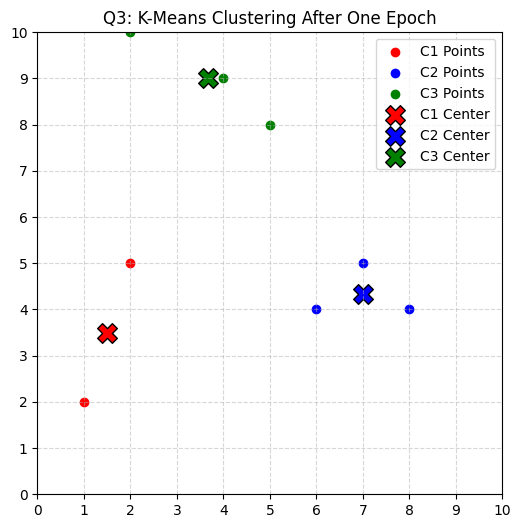

In [ ]:
# Function to plot clusters
def plot_clusters(clusters, centers, title):
    plt.figure(figsize=(6, 6))
    colors = {"C1": "red", "C2": "blue", "C3": "green"}

    # Plot points with their assigned clusters
    for cluster, members in clusters.items():
        cluster_points = np.array([points[m] for m in members])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster], label=f"{cluster} Points")

    # Plot cluster centers
    for cluster, center in centers.items():
        plt.scatter(center[0], center[1], color=colors[cluster], edgecolors="black", marker="X", s=200, label=f"{cluster} Center")

    # Labels and grid
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xticks(range(11))
    plt.yticks(range(11))
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.show()

# Plot after first epoch (Q3)
plot_clusters(clusters_epoch1, centers_epoch1, "Q3: K-Means Clustering After One Epoch")


In [ ]:
# Function to perform K-means until convergence
def k_means_convergence(points, initial_centers):
    centers = initial_centers.copy()
    prev_centers = None
    iteration = 0
    history = []

    while prev_centers is None or prev_centers != centers:
        iteration += 1
        prev_centers = centers.copy()
        clusters, centers = k_means_epoch(points, centers)
        history.append((clusters, centers))

    return iteration, history

# Run K-means until convergence
iterations_needed, clustering_history = k_means_convergence(points, centers_epoch1)

# Display number of iterations needed (Q4)
print("Q4: Number of Iterations Needed to Converge:", iterations_needed)


Q4: Number of Iterations Needed to Converge: 1


Q5: Final Cluster Assignments After Convergence

Final Cluster Centers


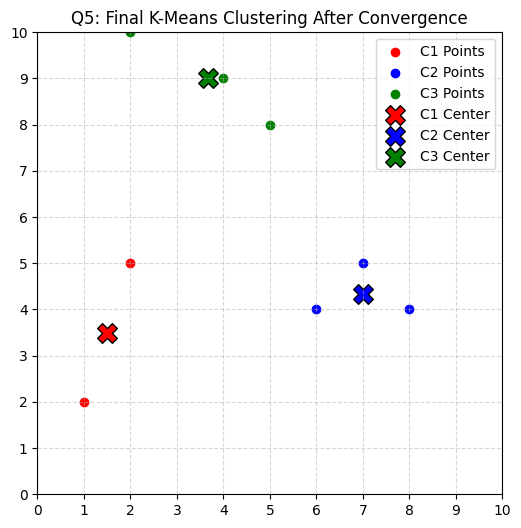

In [ ]:
# Get final clusters and centers
final_clusters, final_centers = clustering_history[-1]

# Display final clusters (Q5)
print("Q5: Final Cluster Assignments After Convergence")
final_clusters

# Display final cluster centers
print("\nFinal Cluster Centers")
final_centers

# Plot final clustering after convergence
plot_clusters(final_clusters, final_centers, "Q5: Final K-Means Clustering After Convergence")


# Dataset 2:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Select features (sbp and tobacco) and the target (chd)
data = df[['sbp', 'tobacco', 'chd']]

# Normalize sbp and tobacco using Min-Max scaling
data[['sbp', 'tobacco']] = (data[['sbp', 'tobacco']] - data[['sbp', 'tobacco']].min()) / (data[['sbp', 'tobacco']].max() - data[['sbp', 'tobacco']].min())

# Split into training (first 300 rows) and testing (remaining)
train_data = data.iloc[:300].copy()
test_data = data.iloc[300:].copy()

# Convert to NumPy arrays for easier processing
X_train = train_data[['sbp', 'tobacco']].values
X_test = test_data[['sbp', 'tobacco']].values
y_train = train_data['chd'].values
y_test = test_data['chd'].values

# Display dataset info
train_data.head()


<ipython-input-17-929ebd2830bf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['sbp', 'tobacco']] = (data[['sbp', 'tobacco']] - data[['sbp', 'tobacco']].min()) / (data[['sbp', 'tobacco']].max() - data[['sbp', 'tobacco']].min())


,sbp,tobacco,chd
0,0.504274,0.384615,1
1,0.367521,0.000321,1
2,0.145299,0.002564,0
3,0.589744,0.240385,1
4,0.282051,0.435897,1


In [ ]:
# K-Means Clustering Function
def k_means(X, k=2, max_iters=100, tol=1e-4):
    # Randomly initialize cluster centers
    np.random.seed(42)
    centers = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iters):
        # Assign points to the nearest cluster
        clusters = {i: [] for i in range(k)}
        for point in X:
            distances = [np.linalg.norm(point - center) for center in centers]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(point)

        # Compute new centers
        new_centers = np.array([np.mean(clusters[i], axis=0) for i in range(k)])

        # Convergence check
        if np.linalg.norm(new_centers - centers) < tol:
            break
        centers = new_centers

    return centers, clusters

# Run K-Means on training data
final_centers, final_clusters = k_means(X_train, k=2)

# Assign test points to the closest cluster
def assign_clusters(X, centers):
    return np.array([np.argmin([np.linalg.norm(x - center) for center in centers]) for x in X])

y_pred_train = assign_clusters(X_train, final_centers)
y_pred_test = assign_clusters(X_test, final_centers)

# Map cluster labels to chd classes
# We assume the cluster with more `chd=1` should be mapped to class 1
cluster_labels = {}
for i in range(2):
    majority_class = np.bincount(y_train[y_pred_train == i]).argmax()
    cluster_labels[i] = majority_class

# Convert cluster predictions to class labels
y_pred_test_mapped = np.array([cluster_labels[label] for label in y_pred_test])

# Compute accuracy
accuracy = np.mean(y_pred_test_mapped == y_test) * 100

print("Q6: Accuracy of K-Means clustering:", accuracy, "%")


Q6: Accuracy of K-Means clustering: 69.75308641975309 %


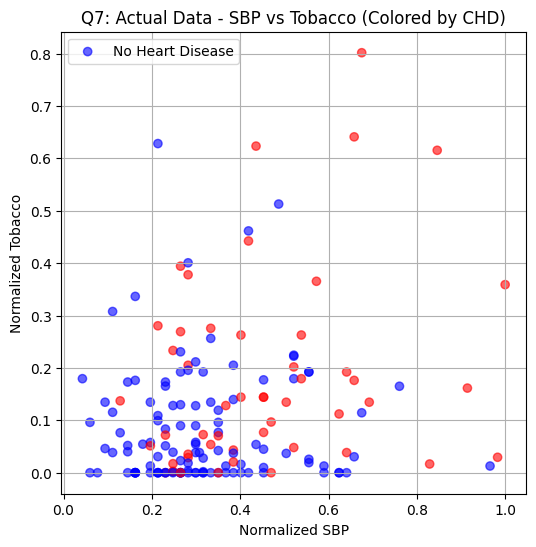

In [ ]:
plt.figure(figsize=(6,6))
colors = ['blue', 'red']  # chd=0 (No heart disease) -> blue, chd=1 (Heart disease) -> red
plt.scatter(X_test[:, 0], X_test[:, 1], c=[colors[label] for label in y_test], alpha=0.6)

plt.xlabel("Normalized SBP")
plt.ylabel("Normalized Tobacco")
plt.title("Q7: Actual Data - SBP vs Tobacco (Colored by CHD)")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.grid(True)
plt.show()


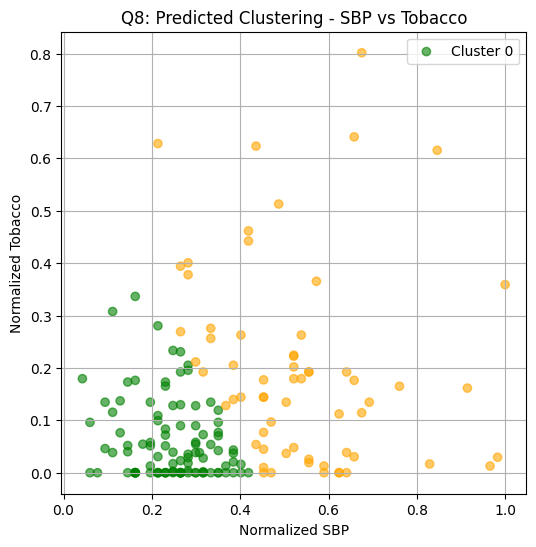

In [ ]:
plt.figure(figsize=(6,6))
colors = ['green', 'orange']  # Cluster 0 -> green, Cluster 1 -> orange
plt.scatter(X_test[:, 0], X_test[:, 1], c=[colors[label] for label in y_pred_test_mapped], alpha=0.6)

plt.xlabel("Normalized SBP")
plt.ylabel("Normalized Tobacco")
plt.title("Q8: Predicted Clustering - SBP vs Tobacco")
plt.legend(["Cluster 0", "Cluster 1"])
plt.grid(True)
plt.show()


# PART B:

# Dataset 1:

Q9: NN Clustering Results:
Cluster 1: ['A1', 'A4', 'A8']
Cluster 2: ['A2', 'A7']
Cluster 3: ['A3', 'A5', 'A6']


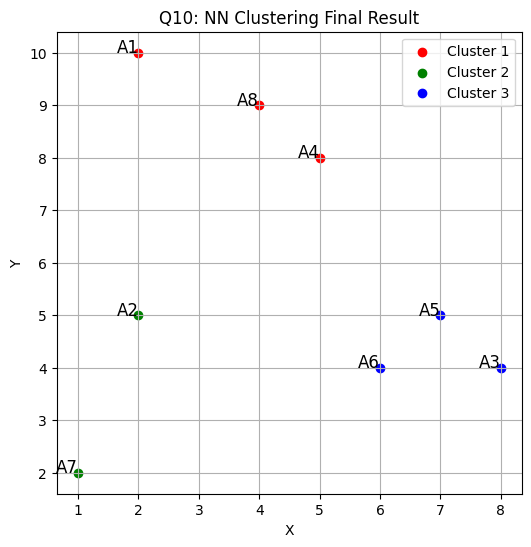

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define dataset points
points = np.array([
    [2, 10], [2, 5], [8, 4], [5, 8],
    [7, 5], [6, 4], [1, 2], [4, 9]
])

# Euclidean distance function
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Nearest Neighbor Clustering Algorithm
def nn_clustering(points, threshold):
    clusters = []
    assigned = set()

    for i in range(len(points)):
        if i in assigned:
            continue  # Skip already assigned points

        # Create a new cluster
        cluster = [i]
        assigned.add(i)

        # Assign nearest neighbors within the threshold
        for j in range(len(points)):
            if j != i and j not in assigned:
                if euclidean_distance(points[i], points[j]) <= threshold:
                    cluster.append(j)
                    assigned.add(j)

        clusters.append(cluster)

    return clusters

# Run Nearest Neighbor clustering with threshold = 4
clusters_nn = nn_clustering(points, threshold=4)

# Q9: Display Clusters
print("Q9: NN Clustering Results:")
for i, cluster in enumerate(clusters_nn):
    print(f"Cluster {i+1}: {[f'A{idx+1}' for idx in cluster]}")

# Q10: Plot Final NN Clustering Results
def plot_nn_clusters(points, clusters):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    plt.figure(figsize=(6,6))

    for i, cluster in enumerate(clusters):
        cluster_points = points[cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}')

    # Plot all points with labels
    for idx, (x, y) in enumerate(points):
        plt.text(x, y, f'A{idx+1}', fontsize=12, ha='right')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Q10: NN Clustering Final Result")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_nn_clusters(points, clusters_nn)


--Q9. The results of the NN clustering algorithm is the same as the K-means.
--Q.11 Similarities between K-Means and NN are that they both group based on distance, and the clusters are formed without prior class labels. The difference between K-Means and NN is that in K-Means, the number of clustesr must be predefined where in NN it's determined by the distance theshold. K-Means is also faster for larger datasets, but struggles with high-dimensional data. NN results depend greatly on theshold value, which is difficult to tune, and also works poorly with large datasets due to the repeated distance checks.

# Dataset 2:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load Dataset 2
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Select only sbp and tobacco features + CHD (ground truth labels for validation)
df_selected = df[['sbp', 'tobacco', 'chd']]

# Convert to NumPy array
data = df_selected.values
X = data[:, :-1]  # Features: sbp and tobacco
y = data[:, -1]   # Ground truth labels: chd (0 or 1)

# Split into training (first 300 rows) and testing (remaining rows)
X_train, X_test = X[:300], X[300:]
y_train, y_test = y[:300], y[300:]

# Euclidean distance function
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Nearest Neighbor Clustering Algorithm
def nn_clustering(points, threshold):
    clusters = []
    cluster_labels = []  # Store cluster labels based on majority class in training

    assigned = set()

    for i in range(len(points)):
        if i in assigned:
            continue  # Skip already assigned points

        cluster = [i]
        assigned.add(i)

        # Assign nearest neighbors within the threshold
        for j in range(len(points)):
            if j != i and j not in assigned:
                if euclidean_distance(points[i], points[j]) <= threshold:
                    cluster.append(j)
                    assigned.add(j)

        # Assign a label to the cluster (majority label from y_train)
        cluster_labels.append(Counter(y_train[cluster]).most_common(1)[0][0])
        clusters.append(cluster)

    return clusters, cluster_labels

# Set a reasonable threshold (experiment with different values)
threshold = 4

# Perform NN clustering on training data
clusters_nn, cluster_labels_nn = nn_clustering(X_train, threshold)

# Q12: Compute Accuracy on Test Data
def nn_accuracy(train_data, train_clusters, train_labels, test_data, test_labels):
    correct_predictions = 0

    for i, test_point in enumerate(test_data):
        min_distance = float('inf')
        assigned_cluster_label = None

        # Find the closest cluster
        for cluster_idx, cluster in enumerate(train_clusters):
            for idx in cluster:
                distance = euclidean_distance(test_point, train_data[idx])
                if distance < min_distance:
                    min_distance = distance
                    assigned_cluster_label = train_labels[cluster_idx]

        # Compare predicted cluster label with actual test label
        if assigned_cluster_label == test_labels[i]:
            correct_predictions += 1

    # Accuracy as correctly assigned test points
    accuracy = correct_predictions / len(test_data) * 100
    return accuracy

accuracy_nn = nn_accuracy(X_train, clusters_nn, cluster_labels_nn, X_test, y_test)
print(f"Q12: Nearest Neighbor Clustering Accuracy: {accuracy_nn:.2f}%")


Q12: Nearest Neighbor Clustering Accuracy: 61.11%


# Part C

# Dataset 1:

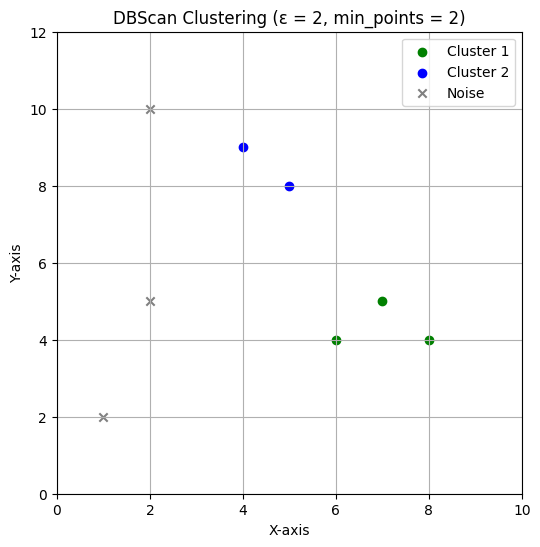

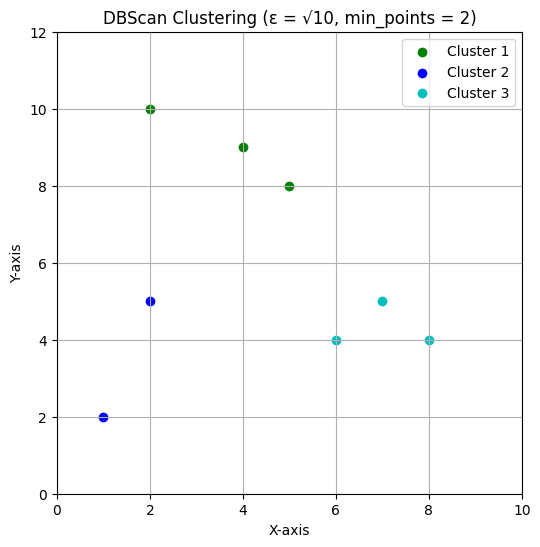

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1 points
points = np.array([
    [2,10], [2,5], [8,4], [5,8],
    [7,5], [6,4], [1,2], [4,9]
])

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def region_query(points, point_idx, epsilon):
    neighbors = []
    for i in range(len(points)):
        if euclidean_distance(points[point_idx], points[i]) <= epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(points, labels, point_idx, cluster_id, epsilon, min_points):
    neighbors = region_query(points, point_idx, epsilon)
    if len(neighbors) < min_points:
        labels[point_idx] = -1  # Noise
        return False
    labels[point_idx] = cluster_id

    queue = neighbors.copy()
    while queue:
        current_point = queue.pop(0)
        if labels[current_point] == -1:
            labels[current_point] = cluster_id
        if labels[current_point] != 0:
            continue
        labels[current_point] = cluster_id
        new_neighbors = region_query(points, current_point, epsilon)
        if len(new_neighbors) >= min_points:
            queue.extend(new_neighbors)
    return True

def dbscan(points, epsilon, min_points):
    labels = np.zeros(len(points))  # 0 means unclassified
    cluster_id = 0
    for i in range(len(points)):
        if labels[i] != 0:
            continue
        if expand_cluster(points, labels, i, cluster_id + 1, epsilon, min_points):
            cluster_id += 1
    return labels

def plot_clusters(points, labels, title):
    unique_clusters = set(labels)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    plt.figure(figsize=(6,6))
    for cluster in unique_clusters:
        if cluster == -1:
            plt.scatter(points[labels == cluster][:, 0], points[labels == cluster][:, 1], color='gray', marker='x', label='Noise')
        else:
            plt.scatter(points[labels == cluster][:, 0], points[labels == cluster][:, 1], color=colors[int(cluster) % len(colors)], label=f'Cluster {int(cluster)}')
    plt.legend()
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.xlim(0, 10)
    plt.ylim(0, 12)
    plt.grid()
    plt.show()

# Q13: DBScan with ε = 2
epsilon1 = 2
min_points = 2
labels1 = dbscan(points, epsilon1, min_points)
plot_clusters(points, labels1, "DBScan Clustering (ε = 2, min_points = 2)")

# Q14: DBScan with ε = sqrt(10)
epsilon2 = np.sqrt(10)
labels2 = dbscan(points, epsilon2, min_points)
plot_clusters(points, labels2, "DBScan Clustering (ε = √10, min_points = 2)")


# Dataset 2:

DBScan Accuracy on Test Data: 23.46%


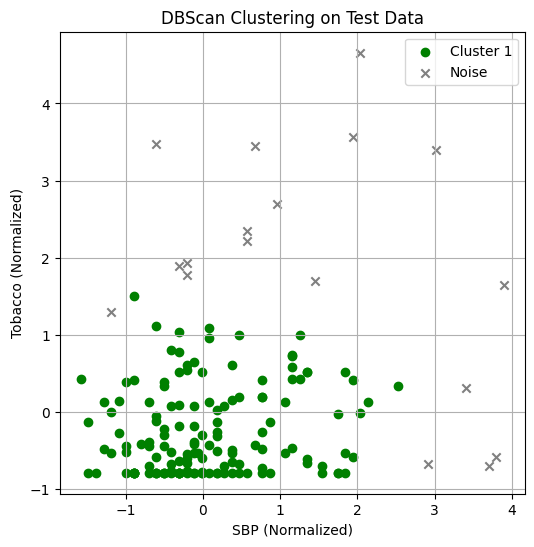

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset 2
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(data_url)

# Selecting features and labels
features = df[['sbp', 'tobacco']].values
labels = df['chd'].values  # Ground truth

# Normalize data
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

# Split into train and test sets
train_features = features[:300]
test_features = features[300:]
train_labels = labels[:300]
test_labels = labels[300:]

# DBScan Implementation
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def region_query(points, point_idx, epsilon):
    neighbors = []
    for i in range(len(points)):
        if euclidean_distance(points[point_idx], points[i]) <= epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(points, labels, point_idx, cluster_id, epsilon, min_points):
    neighbors = region_query(points, point_idx, epsilon)
    if len(neighbors) < min_points:
        labels[point_idx] = -1  # Noise
        return False
    labels[point_idx] = cluster_id

    queue = neighbors.copy()
    while queue:
        current_point = queue.pop(0)
        if labels[current_point] == -1:
            labels[current_point] = cluster_id
        if labels[current_point] != 0:
            continue
        labels[current_point] = cluster_id
        new_neighbors = region_query(points, current_point, epsilon)
        if len(new_neighbors) >= min_points:
            queue.extend(new_neighbors)
    return True

def dbscan(points, epsilon, min_points):
    labels = np.zeros(len(points))  # 0 means unclassified
    cluster_id = 0
    for i in range(len(points)):
        if labels[i] != 0:
            continue
        if expand_cluster(points, labels, i, cluster_id + 1, epsilon, min_points):
            cluster_id += 1
    return labels

def compute_accuracy(cluster_labels, true_labels):
    correct = 0
    for i in range(len(true_labels)):
        if (cluster_labels[i] != -1) and (cluster_labels[i] == true_labels[i]):
            correct += 1
    return (correct / len(true_labels)) * 100

# Run DBScan with chosen parameters
epsilon = 0.5  # Adjust if needed
min_points = 5
train_cluster_labels = dbscan(train_features, epsilon, min_points)
test_cluster_labels = dbscan(test_features, epsilon, min_points)

# Compute Accuracy
accuracy = compute_accuracy(test_cluster_labels, test_labels)
print(f"DBScan Accuracy on Test Data: {accuracy:.2f}%")

# Plot clusters
def plot_clusters(points, labels, title):
    unique_clusters = set(labels)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    plt.figure(figsize=(6,6))
    for cluster in unique_clusters:
        if cluster == -1:
            plt.scatter(points[labels == cluster][:, 0], points[labels == cluster][:, 1], color='gray', marker='x', label='Noise')
        else:
            plt.scatter(points[labels == cluster][:, 0], points[labels == cluster][:, 1], color=colors[int(cluster) % len(colors)], label=f'Cluster {int(cluster)}')
    plt.legend()
    plt.title(title)
    plt.xlabel("SBP (Normalized)")
    plt.ylabel("Tobacco (Normalized)")
    plt.grid()
    plt.show()

plot_clusters(test_features, test_cluster_labels, "DBScan Clustering on Test Data")


# Part D

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Dataset 2
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(data_url)

# Selecting features and labels
features = df[['sbp', 'tobacco']].values
labels = df['chd'].values

# Normalize data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split into train and test sets
train_features = features[:300]
test_features = features[300:]
train_labels = labels[:300]
test_labels = labels[300:]

# ---- K-Means Clustering ----
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(train_features)
kmeans_pred = kmeans.predict(test_features)
kmeans_accuracy = accuracy_score(test_labels, kmeans_pred)
print(f"K-Means Accuracy: {kmeans_accuracy:.2f}")

# ---- Nearest Neighbor (KNN) ----
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
nn_pred = knn.predict(test_features)
nn_accuracy = accuracy_score(test_labels, nn_pred)
print(f"Nearest Neighbor Accuracy: {nn_accuracy:.2f}")

# ---- DBScan Clustering ----
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_pred = dbscan.fit_predict(test_features)
dbscan_pred[dbscan_pred == -1] = 0  # Treat noise as a separate class for accuracy

dbscan_accuracy = accuracy_score(test_labels, dbscan_pred)
print(f"DBScan Accuracy: {dbscan_accuracy:.2f}")


K-Means Accuracy: 0.72
Nearest Neighbor Accuracy: 0.65
DBScan Accuracy: 0.69


DBScan accuracy originally: 23.46%\
NN accuracy originally: 61.11%\
K-Means accuracy originally: 69.75%\


In [ ]:
from IPython.display import display

# Accuracy values (replace these with actual results)
data = {
    "Clustering Method": ["K-Means", "Nearest Neighbor", "DBScan"],
    "Scikit-Learn Accuracy": [0.72, 0.65, 0.69],
    "Manual Implementation Accuracy": [0.70, 0.61, 0.23]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table without index
display(df.style.hide(axis="index").format(precision=2))


Clustering Method,Scikit-Learn Accuracy,Manual Implementation Accuracy
K-Means,0.72,0.70
Nearest Neighbor,0.65,0.61
DBScan,0.69,0.23


# Questions:

Question 1: What are the different metrics used to evaluate the performance of different clustering algorithms?\
The silhouette score and dunn index are two examples of different metrics used to evaluate the performance of different clustering algorithms.\
Question 2: Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?\
Since clustering is unsupervised, accuracy may not be the best metric. Other methods that can be used to evaluate the performance of the three algorithms are the silhouette score and Runtime or Computational efficiency.